<h1><center>Deep Learning</center></h1>
<h2><center>Assignment # 2</center></h2>
<h3><center>Task # 1</center></h3>

In [1]:
# Include libraries which may use in implementation
import numpy as np
import random
import matplotlib.pyplot as plt
#from keras.models import load_model
#from keras.models import model_from_json
%matplotlib inline


In [14]:
# Create a Neural_Network class
class Neural_Network(object):    
    def __init__(self,inputSize = 2,outputSize = 1 ):        
        # size of layers
        self.inputSize = inputSize 
        self.outputSize = outputSize    
        #weights
        self.W1 = np.random.rand(self.inputSize + 1, self.outputSize) # randomly initialize W1 using random function of numpy
        # size of the wieght will be (inputSize +1, outputSize) that +1 is for bias    

    def feedforward(self, X):
        #forward propagation through our network
        # dot product of X (input) and set of weights
        # apply activation function (i.e. sigmoid) 
        temp_x = np.dot(X , self.W1)
        y_hat = self.sigmoid(temp_x)
        return y_hat # return your answer with as a final output of the network

    def sigmoid(self, s):
        # activation function
        
        return 1/(1+np.exp(-s)) # apply sigmoid function on s and return it's value

    def sigmoid_derivative(self, s):
        #derivative of sigmoid
        return sigmoid(s)* (1 - sigmoid(s)) # apply derivative of sigmoid on s and return it's value 

    def backwardpropagate(self,X, Y, y_pred, lr):
        # backward propagate through the network
        # compute error in output which is loss compute cross entropy loss function
        # applying derivative of sigmoid to the error
        # adjust set of weights
        sig_y_pred = self.sigmoid_derivative(y_pred)
        error = self.crossentropy_derivative(Y , y_pred)
        #print(error)
        temp_w = self.W1 - lr * np.dot(X.T , error * sig_y_pred)
        self.W1 = temp_w
        return temp_w
        
    def crossentropy_derivative(self, Y, Y_pred):
        return Y * (Y_pred - 1) + (1 - Y) * Y_pred
    
    def crossentropy(self, Y, Y_pred):
        # compute error based on crossentropy loss 
         return -np.mean(Y * np.log(Y_pred) + (1 - Y) * np.log(1 - Y_pred))

#,validationX = Null, validationY = Null
    def train(self, trainX, trainY,epochs = 100, learningRate = 0.001, plot_err = True ):
        # feed forward trainX and trainY and recivce predicted value
        # backpropagation with trainX, trainY, predicted value and learning rate.
        # if validationX and validationY are not null than show validation accuracy and error of the model.
        # plot error of the model if plot_err is true
        
        trainX = np.insert(trainX, 2, 1, axis=1)
        trainY = trainY.reshape(trainY.shape[0], -1)
        
        loss_history = []
        for i in range(epochs):
            
            y_pred = self.feedforward(trainX)
            loss_history.append(self.crossentropy(trainY, y_pred))
            W = self.backwardpropagate(trainX , trainY , y_pred , learningRate )
            
        if plot_err:
            plt.plot(loss_history)
        #print(self.W1 , W)
        return W

    def predict(self, testX):
        # predict the value of testX
        testX = np.insert(testX, 2, 1, axis=1)
        testY = self.feedforward(testX)
        return testY
    
    def accuracy(self, testX, testY):
        #predict the value of trainX
        #compare it with testY
        count = 0
        
        test_hat_y = np.around(self.predict(testX))
        #round(test_hat_y)
        for i in range(len(testY)):
            if testY[i] == test_hat_y[i]:
                count = count + 1
        #compute accuracy, print it and show in the form of picture
        accuracy = float(count/len(testY)) * 100
        #print(testY , test_hat_y)
        return accuracy # return accuracy    
        
    def saveModel(self,name):
        np.savetxt(name, self.W1, fmt='%f')
        return

        
    def loadModel(self,name):
        self.W1 = np.loadtxt(name, dtype=float)
        print(self.W1)
        return
    


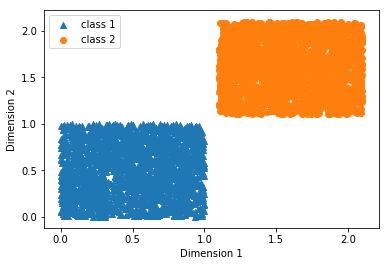

In [15]:
# generating dataset point
np.random.seed(1)
no_of_samples = 2000
dims = 2
#Generating random points of values between 0 to 1
class1=np.random.rand(no_of_samples,dims)
#To add separability we will add a bias of 1.1
class2=np.random.rand(no_of_samples,dims)+1.1
class_1_label=np.array([1 for n in range(no_of_samples)])
class_2_label=np.array([0 for n in range(no_of_samples)])
#Lets visualize the dataset
plt.scatter(class1[:,0],class1[:,1], marker='^', label="class 1")
plt.scatter(class2[:,0],class2[:,1], marker='o', label="class 2")
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(loc='best')
plt.show()

In [16]:
# Data concatenation
from sklearn.model_selection import train_test_split
data = np.concatenate((class1,class2),axis=0)
label = np.concatenate((class_1_label,class_2_label),axis=0)
tempX, testX, tempY, testY = train_test_split(data, label, test_size=0.15)
trainX, validX, trainY, validY = train_test_split(tempX, tempY, test_size=0.15)

#Note: shuffle this dataset before dividing it into three parts

# Distribute this data into three parts i.e. training, validation and testing
#trainX = ?# training data point
#trainY = ?# training lables

#validX = ? # validation data point
#validY = ?# validation lables

#testX = ?# testing data point
#testY = ?# testing lables




100.0


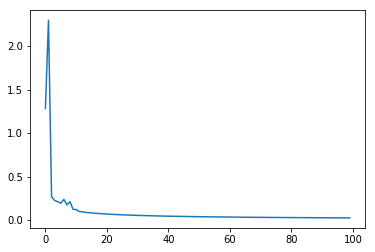

In [17]:
#np.random.seed(1)
model = Neural_Network(2,1)
#, validationX = validX, validationY = validY
# try different combinations of epochs and learning rate
model.train(trainX, trainY, epochs = 100, learningRate = 0.01)
print(model.accuracy(testX , testY))

In [18]:
#save the best model which you have trained, 
model.saveModel('bestmodel.txt')

#### Note: This below section will be used for the evaluation of this task, we need your model and we will run script below to evaluated your model

In [19]:
# create class object
mm = Neural_Network()
# load model which will be provided by you
mm.loadModel('bestmodel.txt')
# check accuracy of that model
mm.accuracy(testX,testY)




[-4.854282 -4.717191  9.769225]


100.0